### Contexto

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 de 2224 passageiros e tripulação.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.


### Objetivo Geral

Definir um modelo de classificação de Machine Learning capaz de classificiar com eficiência sobreviventes do titanic

### Objetivos Específicos

- Usar novas funções que não estou acostumado como: .map, aply(lambda) e listcomprehension
- Usar um novo tipo de gráfico: pivot_table()
- Testar pelo menos 5 modelos de ML de classificação
- Fazer pelo menos uma tentativa de Feature Engineering

### Fonte

A base de dados foi retirada do site kaggle, podendo ser obtida em: https://www.kaggle.com/c/titanic
Usei como base 2 projetos que me auxiliaram muito, principalmente na etapa de tratamento de dados e feature engineering. 
Os projetos podem ser encontrados nesses links:
    
    1. https://www.kaggle.com/kenjee/titanic-project-example/notebook
    2. https://www.kaggle.com/javigallego/top-5-hyperparameter-tuning-ensemble-modeling?scriptVersionId=88795500
Na etapa de treinamento dos modelos usei como base o artigo a seguir:<br>

    1. https://medium.com/geekculture/applying-7-classification-algorithms-on-the-titanic-dataset-278ef222b53c

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Compreensão da Base

### Visualização Inicial

In [2]:
# Importando as Bases
# Os 3 arquivos foram deixados em uma pasta chamada 'bases'
caminho = pathlib.Path('bases')
# Lendo os arquivos de treino e teste
treino_df = pd.read_csv(caminho / 'train.csv') 
teste_df = pd.read_csv(caminho / 'test.csv')
display(treino_df, teste_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- Podemos ver que a base de treino possui a coluna 'Survived'
- Já a base de teste não possui a confirmação se a pessoa sobreviveu ou não
- Vamos treinar os modelos apenas na base de treino, assim eles poderam ser aplicados na base de teste

In [3]:
# Verificação colunas
print('\n'.join(list(treino_df.columns)))

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


### Descrição das colunas

- PassengerId: Identificação do Passageiro
- Survived: Parâmetro binário que indica se o passageiro sobrevivei, sendo 0 = Não e 1 = Sim 
- Pclass: Classe de Ticket, sendo 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
- Name: Nome do Passageiro
- Sex: Sexo
- Age: Idade
- SibSp: Indica se o passageiro está viajando acompanhado com imão, esposa, etc. 
- Parch: Indica se o passageiro está viajando com pais, filhos, netos, etc.
- Ticket: Número do Ticket
- Fare: Tarifa do Passageiro
- Cabin: Número da Cabine
- Embarked: Local de Embarque, sendo C = Cherbourg, Q = Queenstown, S = Southampton

### Análise inicial

In [4]:
# Verificação dados
treino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
treino_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Coluna 'Age' possui poucos valores vazios
- Coluna 'Cabin' está praticamente vazia (menos de 1/4 dos dados preenchidos)
- Coluna 'Embarked' apenas 2 valores vazios
- Atenção! Completar esses valores vazios pode ser um desafio e pode exigir um pouco de criatividade
- As decisões que serão tomadas podem impactar muito na elaboração do modelo de classificação
- Um bom trabalho na etapa de visualização pode ajudar a perceber tendências que ajudem na tomada de decisão sobre o que deve ser feito com esses valores vazios
- Coluna 'PassengerId pode ser descartada, não traz informações relevantes para os modelos de previsão

# Análise Exploratória de Dados

- Vamos avaliar coluna por coluna buscando padrões que possam ajudar a entender melhor a característica dos dados que possuímos

### Análise Geral

<AxesSubplot:>

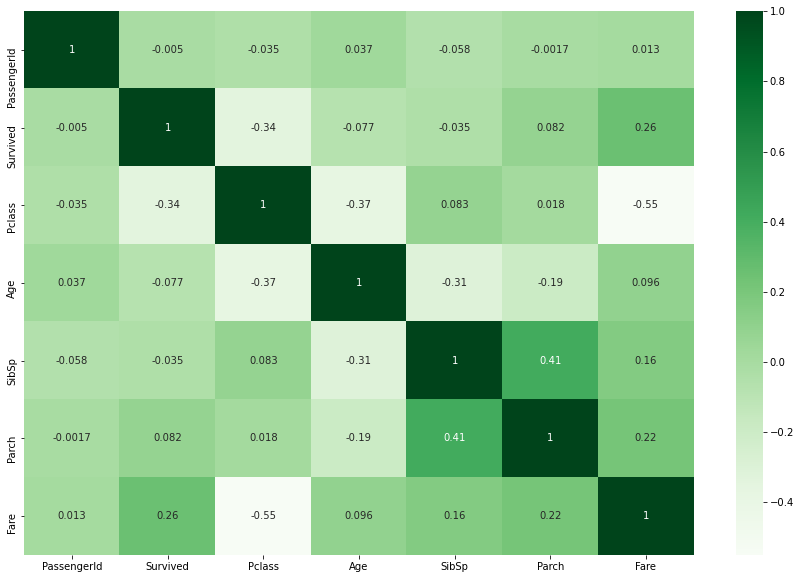

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(treino_df.corr(), annot=True, cmap='Greens')

- Não foi notada nenhuma relação muito forte entre colunas
- O maior coeficiente de correlação (em módulo) da coluna 'Survived' foi com a coluna 'Pclass'
- Coluna 'Fare' e a Coluna 'Pclass' possuem o maior valor de coeficiente de correlação (em módulo)

## Análise Colunas

- Não vamos nos preocupar em fazer nenhuma manipulação nas colunas nesse primeiro momento
- O objetivo dessa etapa é conhecer a base e posteriormente (Etapa de Tratamento de Dados e Feature Engineering) adaptar algumas colunas para que seja possível fazer o treinamento dos modelos

### Survived
- Queremos ver como a relação Sobrevivente/Não Sobrevivente se mantém comparando diferentes cenários

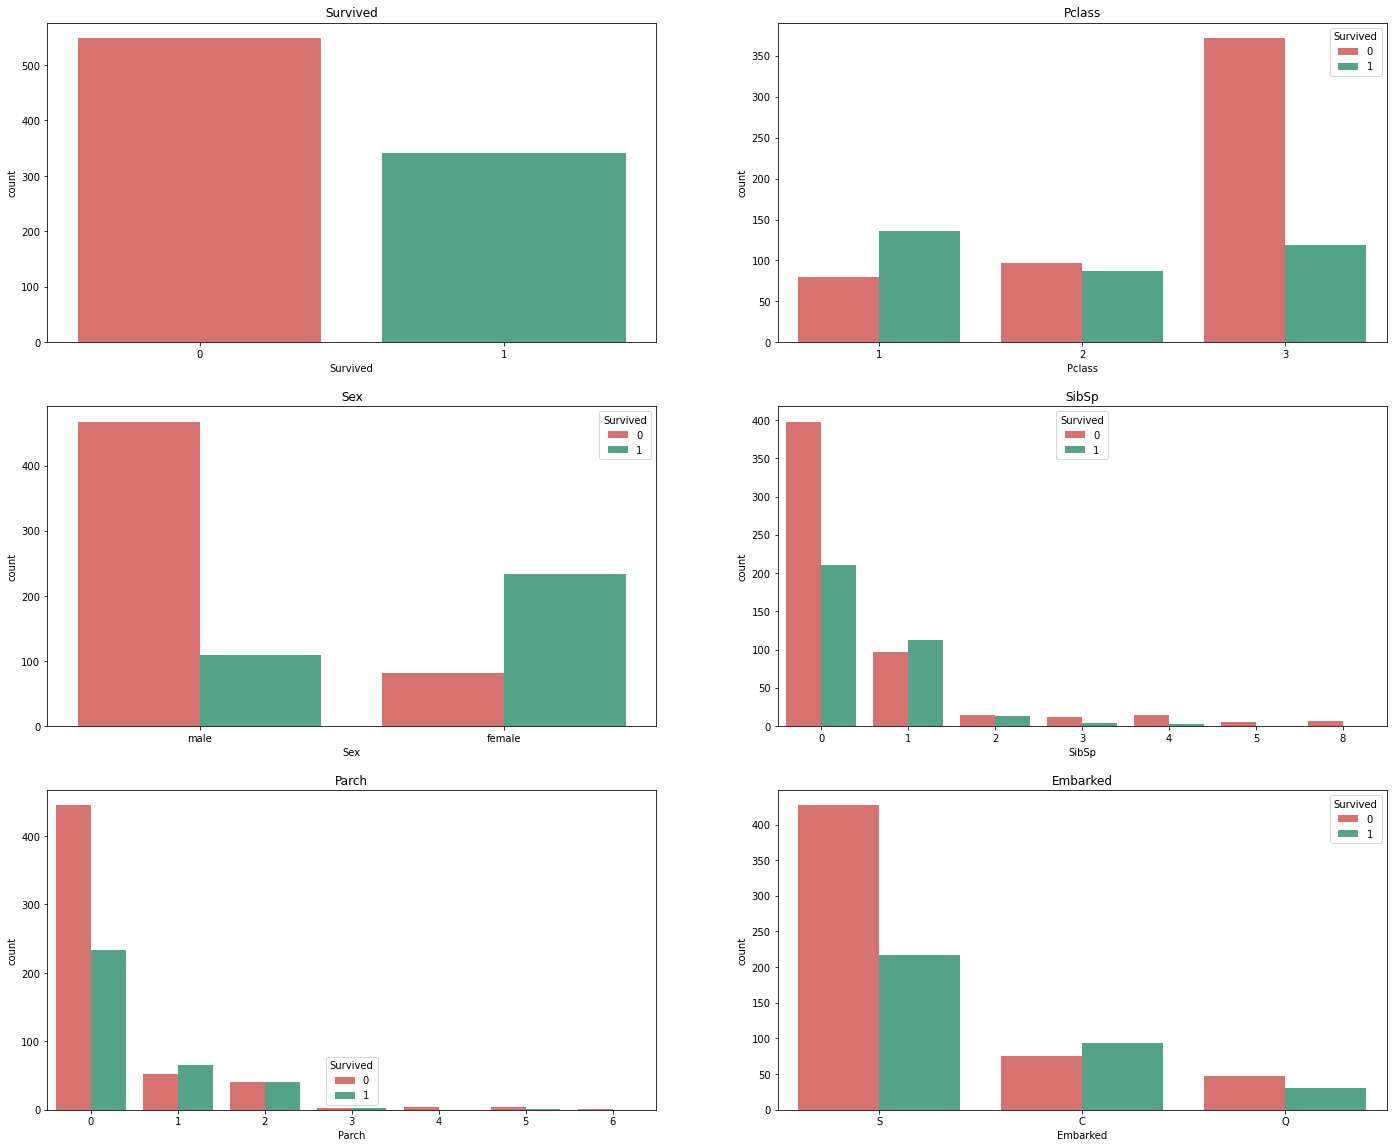

In [7]:
coluna_lt = ['Survived',
              'Pclass',
              'Sex',
              'SibSp',
              'Parch',
              'Embarked'
             ]

plt.figure(figsize=(24,20))

for i, coluna in enumerate(coluna_lt):
    if i == 0:
        plt.subplot(3,2,i+1)
        g = sns.countplot(x = coluna, data = treino_df, palette = ['#E7625F','#45B08C'])
        g.set_title(coluna)
    else:
        plt.subplot(3,2,i+1)
        g = sns.countplot(x = coluna, hue='Survived', data = treino_df, palette = ['#E7625F','#45B08C'])
        g.set_title(coluna)

plt.show()

In [8]:
# Taxa de sobreviventes
mortos = treino_df['Survived'].value_counts()[0]
vivos = treino_df['Survived'].value_counts()[1]
taxa_sobreviventes = vivos / (mortos + vivos)
print('A taxa de sobrevivência geral foi de {:.2%}'.format(taxa_sobreviventes))

A taxa de sobrevivência geral foi de 38.38%


- Podemos observar diferenças interessantes:<br>
    1. Pessoas da PClasse 3 sobreviveram menos
    2. Homens no geral tiveram uma taxa de morte maior que mulheres
    3. Pessoas com a classificação 0 em SibSp tiveram uma taxa de morte maior que todas as outras classificações
    4. Pessoas com a classificação 0 em Parch tiveram uma taxa de morte maior, e os com classificação 1 tiverem uma taxa se sobrevivência positiva (mais sobreviventes que mortos)
    5. Passageiros que embarcaram pela entrada 'S' tiveram uma taxa de morte muito superios aos que embarcaram pelas entradas 'C' e 'Q'

### Age
- Queremos entender como a idade afetou a chance de sobrevivência
- Vamos avaliar diversos cenários:
    1. População Inteira
    2. Apenas Crianças (idade < 18 anos)
    3. Apenas Melheres Adultas
    4. Apenas Homens Adultos 

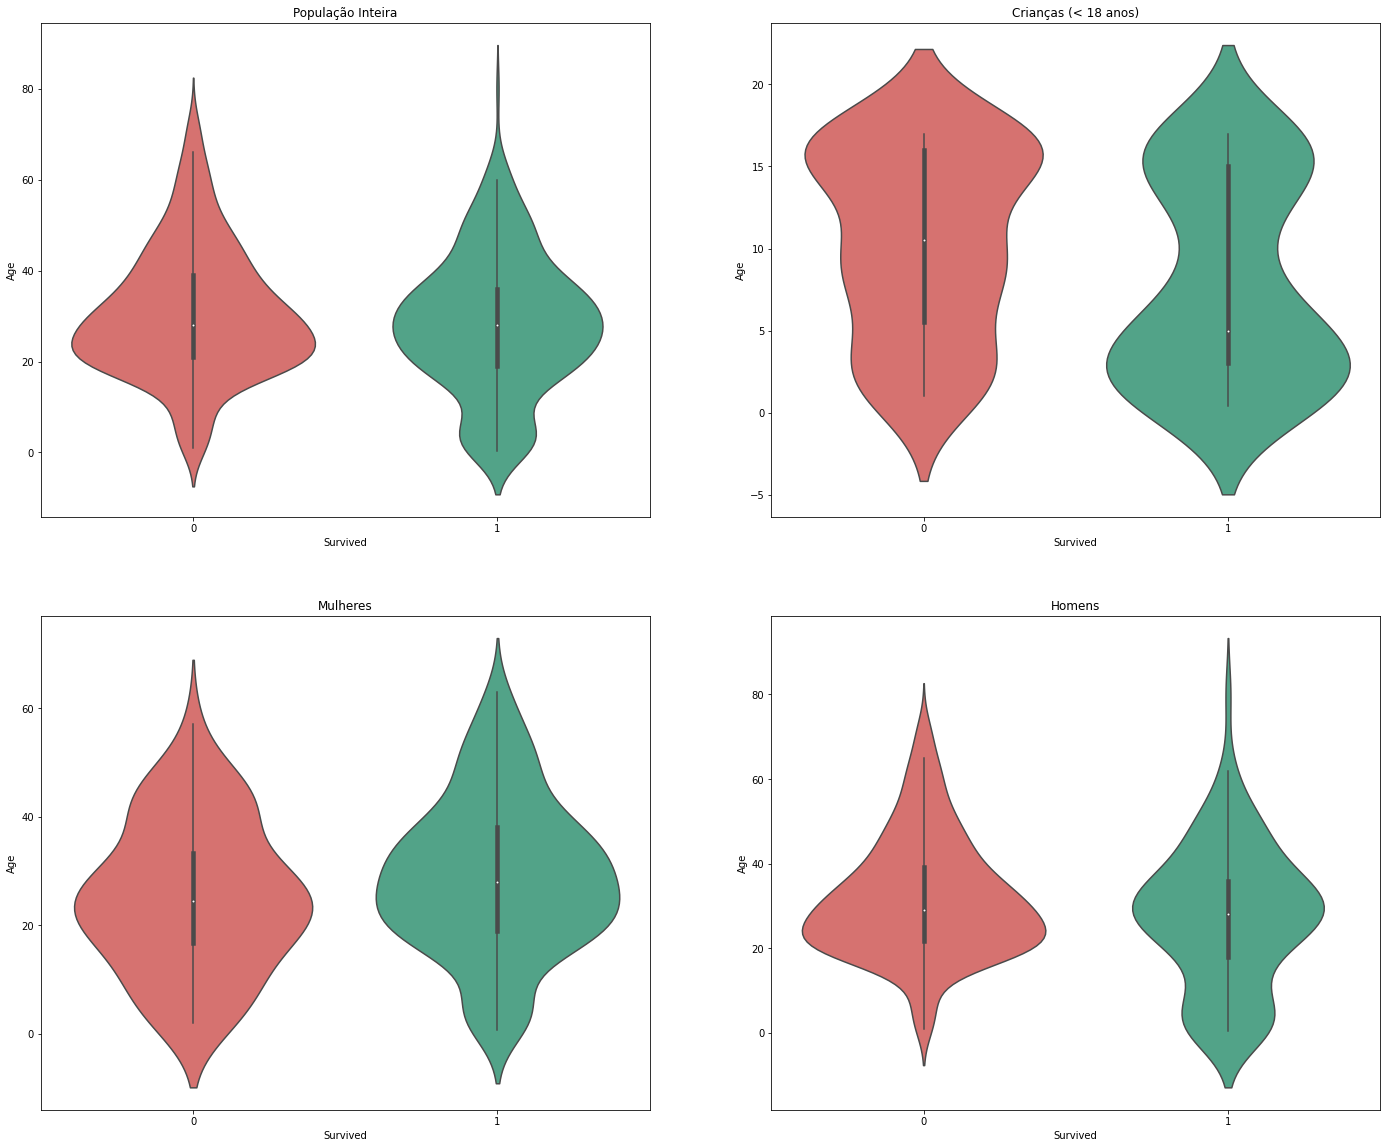

In [9]:
pop_inteira = treino_df
criancas = treino_df[treino_df['Age'] < 18]
mulheres = treino_df[treino_df['Sex'] == 'female']
homens = treino_df[treino_df['Sex'] == 'male']


coluna_lt = [pop_inteira, criancas, mulheres, homens,]
titulos_lt = ['População Inteira', 'Crianças (< 18 anos)', 'Mulheres', 'Homens']

plt.figure(figsize=(24,20))

for i, coluna in enumerate(coluna_lt):
        plt.subplot(2,2,i+1)
        sns.violinplot(x = 'Survived', y = 'Age', data = coluna, palette = ['#E7625F','#45B08C'])
        plt.title(titulos_lt[i])
plt.show()

- Interpretação:
    1. Gráfico "População Inteira": Perfil semelhante, mais mortos que sobreviventes
    2. Gráfico "Crianças (< 18 anos)": Criaças com menos de 10 anos sobreviveram um pouco mais (perfil do gráfico sobreviventes está um pouco maior que o perfil dos não sobreviventes)
    3. Gráfico "Mulheres": Padrão semelhante
    4. Gráfico "Homens": Tendência maior de mortes, principalmente na faixa dos 20 aos 40 anos

### Fare
- Queremos analisar o impacto da tarifa na razão de sobreviventes
- Avaliar se nos passageiros que pagaram mais houveram mais sobreviventes

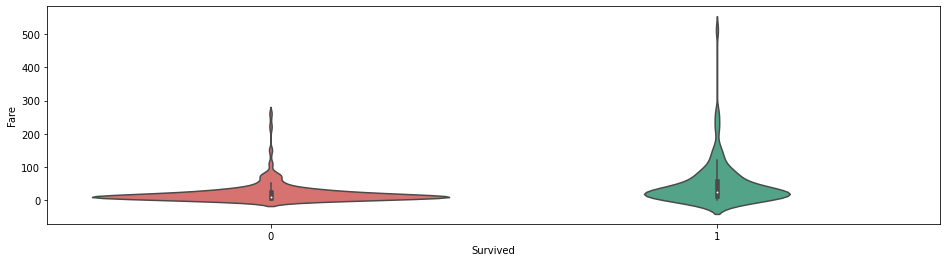

In [10]:
plt.figure(figsize=(16,4))
sns.violinplot(x = 'Survived', y = 'Fare', data = treino_df, palette = ['#E7625F','#45B08C'])
plt.show()

- É nítido que passageiros que pagaram mais tiveram mais chance de sobreviver
- A proporção de mortos é muito maior que a de sobreviventes principalmente na faixa de valor 0-50
- Isso provavelmente se deve a locais com tarifas mais altas estarem associados a proximidade de acesso aos botes salva-vidas ou saídas de emergência

In [11]:
# Variável Contínua x Discreta
# Para plotar com mais eficiência a coluna 'Fare', vamos transforma-la em uma variável discreta
# Dividindo os valores em 15 faixas

faixas = ['1', '2', '3', '4', '5', '6', '7','8','9','10']
treino_df['FareFaixa'] = pd.qcut(treino_df['Fare'], 10, labels = faixas)
treino_df['Fare'] = pd.to_numeric(treino_df['Fare'], errors = 'coerce')
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,9
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,9
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,8
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,7
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,8


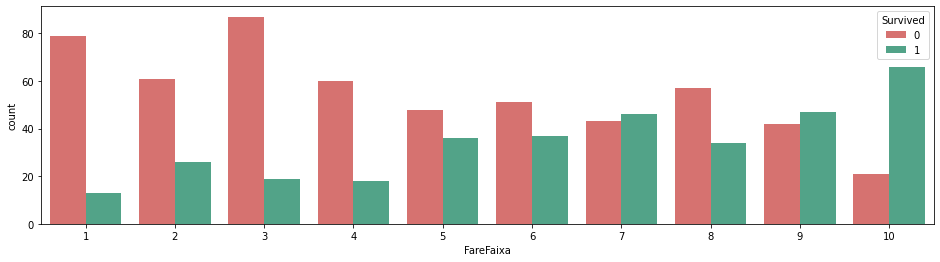

In [12]:
# Agora podemos analisar como a variável 'Survived' se comporta para diferentes faixas de 'Fare'
plt.figure(figsize=(16,4))
sns.countplot(x = 'FareFaixa', hue = 'Survived', data = treino_df, palette = ['#E7625F','#45B08C'])
plt.show()

- Veja que conforme a o valor do Fare aumenta as chances de sobreviver aumentam de maneira significativa
- Nas primeiras 4 faixas a proporção de mortos é muito maior
- Nas faixas 5, 6, 7, 8 a proporção é relativamente equilibrada, embora a proporçao de mortos ainda seja superior
- Nas faixas 9 e 10 a proporção de sobreviventes passa a de mortos, sendo que na última a proporção de sobreviventes é muito maior 

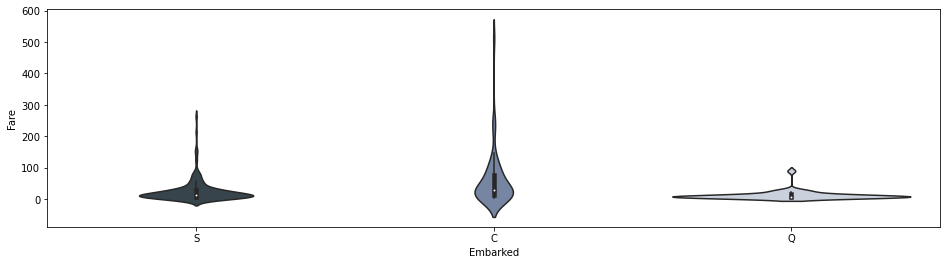

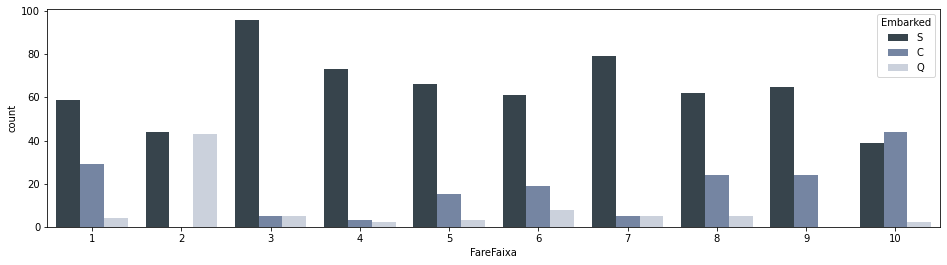

In [13]:
# Vamos ver agora a relação da tarifa com o local de embarque

plt.figure(figsize=(16,4))
sns.violinplot(x = 'Embarked', y = 'Fare', data = treino_df, palette = ['#334550','#6D83AA','#C8D0DF'])

plt.figure(figsize=(16,4))
sns.countplot(x = 'FareFaixa', hue = 'Embarked', data = treino_df, palette = ['#334550','#6D83AA','#C8D0DF'])
plt.show()

- É possível ver que as pessoas que embarcaram pela região C pagaram em geral mais caro. Conforme a classificação da faixa aumenta a barra 'C' tende a crescer também, principalmente nas últimas faixas vemos um aumento expressivo
- Pessoas que embarcaram pelo local 'S' estão presentes de maneira considerável em todas as faixas de 'fare'

# Tratamento de Dados

- A coluna 'Age' e 'Cabin' vão precisar de maior atenção na etapa de tratar valores vazios
- A coluna 'Embarked' possui apenas 2 valores vazios e pode ser tratada mais facilmente 

### Embarked

In [14]:
# Como forma de preencher os valores faltantes de Embarked iremos avaliar a moda
treino_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# Como o local de embarque mais frequente foi o 'S', iremos usa-lo como generalização
moda = 'S'
treino_df['Embarked'] = treino_df['Embarked'].replace(np.nan, moda)
display(treino_df)

# Veja que o número passou de 644 para 646
# Antes haviam 2 valores vazios e agora não há nenhum
print("-"*50)
print(treino_df['Embarked'].value_counts())
print("-"*50)
treino_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,9
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,9
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,8
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,7
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,8


--------------------------------------------------
S    646
C    168
Q     77
Name: Embarked, dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  FareFaixa    891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


### Age

In [16]:
# Avaliar o perfil dos passageiros que possuem valores vazios na coluna idade (visto que não são muitos)
# talvez seja possível identificar algum padrão
base_nan = treino_df[treino_df['Age'].isnull()]
display(base_nan)
base_nan.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,4
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,5
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,9
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,4
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  177 non-null    int64   
 1   Survived     177 non-null    int64   
 2   Pclass       177 non-null    int64   
 3   Name         177 non-null    object  
 4   Sex          177 non-null    object  
 5   Age          0 non-null      float64 
 6   SibSp        177 non-null    int64   
 7   Parch        177 non-null    int64   
 8   Ticket       177 non-null    object  
 9   Fare         177 non-null    float64 
 10  Cabin        19 non-null     object  
 11  Embarked     177 non-null    object  
 12  FareFaixa    177 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 18.5+ KB


Observe a tavela de valores non-null, podemos dizer que:
- A maioria dos passageiros que não possuem dados de idade também não possuem dados cabine


,Pclass
PassengerId,-0.017462
Survived,-0.181577
Pclass,1.000000
Age,NaN
SibSp,0.128689
Parch,0.151028
Fare,-0.501477


<AxesSubplot:>

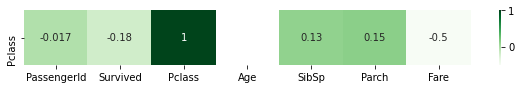

In [17]:
# Análise coluna Pclass
# Anteriormente vimos que essa coluna é a que está mais relacionada com a taxa de sobrevivência
# 0.34 de corr em valores absolutos
# Seria interessante usar uma relação entre a coluna Pclass para preencher os valores vazios da coluna Age
plt.figure(figsize=(10, 1))
treino_corr_df = pd.DataFrame(base_nan.corr()['Pclass'])
display(treino_corr_df)
sns.heatmap(treino_corr_df.transpose(), annot=True, cmap='Greens')

- Outro ponto interessante é a forte relação entre Pclass e a coluna Fare

,Age
PassengerId,0.036847
Survived,-0.077221
Pclass,-0.369226
Age,1.000000
SibSp,-0.308247
Parch,-0.189119
Fare,0.096067


<AxesSubplot:>

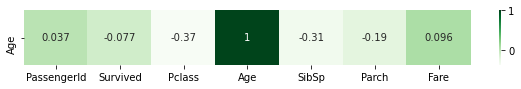

In [18]:
# Analisando a base completa
plt.figure(figsize=(10, 1))
treino_corr_df = pd.DataFrame(treino_df.corr()['Age'])
display(treino_corr_df)
sns.heatmap(treino_corr_df.transpose(), annot=True, cmap='Greens')

- Observando o gráfico de calor podemos ver que a coluna que possui maior relação com a idade é a coluna 'Pclass'
- Assim a coluna Pclass possui uma relação com 2 colunas importantes:
    1. Preço: Coluna que queremos completar valores faltantes
    2. Survived: Coluna alvo do nosso modelo de classificação
- Como alternativa para preencher os valores faltantes vamos observar 6 grupos
- Vamos avaliar o valor da mediana da idade das pessoas de cada Classe de Ticket
- Além disso vamos fazer a distinção de masculino e feminino
- Pela relação negativa podemos ver que existe uma tendência:
- Quanto maior o valor do Pclass, mais baixo a pessoa está alocada e maior as chances de não sobreviver 

In [19]:
# Análise do valor da mediana para os diferentes grupos
mediana = treino_df.groupby(['Sex','Pclass']).median()
display(mediana)
mediana_df = mediana['Age']
display(mediana_df)

PassengerId  Survived   Age  SibSp  Parch      Fare
Sex    Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000
       3             466.0       0.0  25.0    0.0    0.0   7.92500

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [20]:
# Será necessário substituir os valores vazios pelos valores de mediana coretos

# Vamos separar uma cópia da base
# Vamos resolver esse problema de 2 formas
# A segunda forma será usado na base copiada
treino1_df = treino_df.copy()

# Substituindo os valores Nan da coluna 'Age'
values = {"Age":"-"}
treino_df = treino_df.fillna(value = values)

for i in range(6):
    treino_df.loc[(treino_df['Age'] == '-') &
                  (treino_df['Sex'] == mediana_df.index[i][0]) & 
                  (treino_df['Pclass']== mediana_df.index[i][1])
                  ,'Age'] = mediana_df[i]
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8


- Dessa forma conseguimos preencher todos os valores faltantes na coluna Age

In [21]:
# Forma mais direta de resolver o mesmo problema anterior

treino1_df['Age'] = treino1_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

# Veja por exemplo na linha 888
# A idade anteriormente estava como NaN
# Como era uma mulher e com Pclass 3, a idade foi ajustada para 21.5
display(treino1_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,9
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,9
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,8
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,8


- Obtemos o mesmo resultado e com menos linhas de código

### Cabin

- É possível que exista alguma relaçãoe entre as colunas 'Fare' e a coluna 'Cabin'
- Talvez existam cabines mais caras e talvez vamos conseguir prever qual foi a cabine usava a partir da coluna 'Fare'

In [22]:
# Vamos fazer um tretamento na coluna 'Cabin'
# O número não importa, apenas a classificação alfabética 
# O número de cabines também pode importar

def sem_num(item):
    if type(item) == list:
        letra = [i[:1] for i in item]
        return str(letra)
    else:
        return np.nan

treino_df['CabinX'] = treino_df['Cabin'].str.split(' ')
treino_df['CabinX'] = treino_df['CabinX'].map(sem_num)
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,['C']
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,['C']
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8,['B']
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8,['C']


['C']                   51
['B']                   36
['E']                   32
['D']                   32
['A']                   15
['F']                    9
['B', 'B']               7
['C', 'C', 'C']          4
['G']                    4
['C', 'C']               4
['F', 'G']               3
['B', 'B', 'B', 'B']     2
['B', 'B', 'B']          2
['F', 'E']               1
['T']                    1
['D', 'D']               1
Name: CabinX, dtype: int64


<AxesSubplot:xlabel='CabinX', ylabel='Fare'>

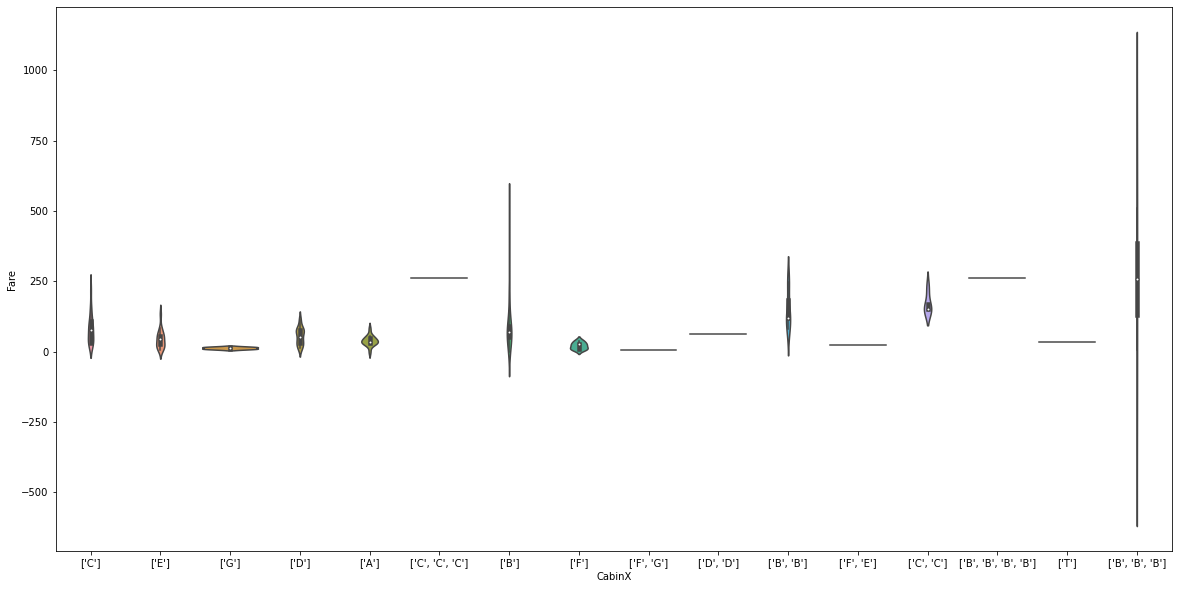

In [23]:
# Vamos ver como se comporta o valor da coluna 'Fare' para cada cabine
print(treino_df['CabinX'].value_counts())

plt.figure(figsize=(20, 10))
sns.violinplot(x = 'CabinX', y = 'Fare', data = treino_df)

- Não acredito que haja uma relação tão clara entre as duas variáveis
- Praticamente todas as cabines ficam entre os valores 0 e 150, difícil estabeler uma relação por enquanto

In [24]:
# Vamos avaliar o valor médio de cada cabine
v_medio = treino_df.groupby(['CabinX']).mean()
v_medio = v_medio.sort_values('Fare', ascending = False)
display(v_medio)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
CabinX,,,,,,
"['C', 'C', 'C']",224.500000,0.500000,1.000000,2.500000,2.500000,263.000000
"['B', 'B', 'B', 'B']",527.500000,1.000000,1.000000,2.000000,2.000000,262.375000
"['B', 'B', 'B']",776.500000,0.500000,1.000000,0.000000,0.500000,258.664600
"['C', 'C']",451.000000,0.500000,1.000000,1.000000,1.500000,170.543750
"['B', 'B']",514.714286,0.714286,1.000000,0.571429,1.428571,150.605943
['B'],508.722222,0.750000,1.000000,0.250000,0.333333,89.956947
['C'],417.215686,0.607843,1.000000,0.470588,0.235294,81.857924
"['D', 'D']",98.000000,1.000000,1.000000,0.000000,1.000000,63.358300
['D'],487.750000,0.750000,1.125000,0.437500,0.281250,57.053522


- Ao observar essa tabela pude ver de que a posição da cabine pode ter grande impacto na chance de sobrevivência da pessoa
- Podemos acompanhar a média de sobrevivência por cabine e também podemos ver o valor médio pago por cabine
- Um maior número de cabines pode estar associado a valores mais altos visto que as 3 primeiras posições são ocupadas por valores com 3 ou 4 cabines juntas
- Como essa etapa se trata de completar os conjuntos vazios e não foi possível achar uma relação clara entre as cabines e também não temos certeza se existem cabines além das obtidas na base de dados, vamos preencher os valores vazios com a classificação hipotética 'X'
- Para o caso dos valores que possuem mais de uma cabine, no geral as cabines são iguais com exceção dos valores ['F','E'] e ['F','G']. Como eles são minorias vamos considera-los como pertencentes apenas da cabine F

- A partir desse ponto vamos agrupar as cabines da seguinte forma:

['A'] --> A <br>
['B'], ['B', 'B'], ['B', 'B', 'B'], ['B', 'B', 'B', 'B'] --> B <br>
['C'], ['C', 'C'], ['C', 'C', 'C'] --> C                 
['D'], ['D', 'D'] --> D                  
['E'] --> E                   
['F'], ['F', 'G'], ['F', 'E'] --> F                 
['G'] --> G                   
['T'] --> T                           

In [25]:
# Agrupamento colunas
treino_df['CabinX'] = treino_df['CabinX'].apply(lambda x: x[2] if type(x)==str else x) 
display(treino_df.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,NaN
5,6,0,3,"Moran, Mr. James",male,25,0,0,330877,8.4583,NaN,Q,4,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,9,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,6,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,5,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,8,NaN


In [26]:
# Preencher os valores vazios
display(treino_df)
x = {'CabinX':'X'}
treino_df = treino_df.fillna(value = x)
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,X
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5,X
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7,X
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8,C


# Feature Engineering

- Nessa etapa queremos achar uma forma de interpretar algumas colunas de uma maneira mais eficiente
- As colunas 'Name', 'Ticket' e 'Cabin' podem nos trazer informações valiozas

### Cabin

In [27]:
# Marcando o número total de cabines de cada passageiro

treino_df['Cabin Num'] = treino_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX,Cabin Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,X,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,X,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,X,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5,X,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7,X,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8,C,1


In [28]:
# vamos entender como está o perfil dessa coluna
pd.pivot_table(treino_df, index = 'Survived', columns = 'Cabin Num', values = 'Age',aggfunc ='count')

# Vamos que o perfil da coluna '0' não se parece com nenhuma outra coluna (1, 2, 3 e 4)

Cabin Num,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


### Name

- Vamos ver o nome social dos passageiros e ver como eles influenciam na taxa de sobrevivência das pessoas

In [29]:
# O que nos interessa é pegar o termo intermediário
# Poderemos tirar informações sobre status social e sobreviventes

lt = list(treino_df['Name'])

lt1 = []

for item in lt:
    item = item.split(',')
    item = item[1].split('.')
    lt1.append(item[0].strip())
# Dessa forma obtemos o nome que nos interessa    
lt1

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [30]:
# Uma forma mais rápida de obter essa lista seria:
lt = list(treino_df['Name'])
lt1 = [item.split(',')[1].split('.')[0].strip() for item in lt]
lt1

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

- Veja que filtramos todos os nomes da coluna 'Name'

In [31]:
# Vamos fazer o mesmo raciocício do código anterior, mas agora usando a função lambda
treino_df['Social'] = treino_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX,Cabin Num,Social
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,X,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,X,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,C,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,X,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5,X,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8,B,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7,X,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8,C,1,Mr


In [32]:
# Vamos entender como está o perfil dessa coluna
pd.pivot_table(treino_df, index = 'Survived', columns = 'Social', values = 'Age',aggfunc ='count')

Social,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


### Ticket

- Ao observar a coluna 'Ticket' é possível ver que existem valores apenas numéricos e valores com alguma identificação alfabética
- Queremossaber se essa diferença gerou impacto na taxa de sobrevivência

In [33]:
# O que pretendo fazer é semelhante a estrutura abaixo
# Tickets com informações alfabéticas estão indicadas logo no começo da string
# Vamos analisar apenas esse trecho até o primeiro espaço e julgar se é uma informação numérica ou alfabética

lt = list(treino_df['Ticket'])

lt1 = []

for item in lt:
    item = item.split(' ')
    item = item[0]
    item = item.replace('/', '')
    item = item.replace('.', '')
    item = item.replace(' ', '')
    try:
        item = int(item)
        lt1.append(item)
    except:
        lt1.append(item)
        
x = zip(lt,lt1)
for item in x:
    print(item, type(item[1]))

('A/5 21171', 'A5') <class 'str'>
('PC 17599', 'PC') <class 'str'>
('STON/O2. 3101282', 'STONO2') <class 'str'>
('113803', 113803) <class 'int'>
('373450', 373450) <class 'int'>
('330877', 330877) <class 'int'>
('17463', 17463) <class 'int'>
('349909', 349909) <class 'int'>
('347742', 347742) <class 'int'>
('237736', 237736) <class 'int'>
('PP 9549', 'PP') <class 'str'>
('113783', 113783) <class 'int'>
('A/5. 2151', 'A5') <class 'str'>
('347082', 347082) <class 'int'>
('350406', 350406) <class 'int'>
('248706', 248706) <class 'int'>
('382652', 382652) <class 'int'>
('244373', 244373) <class 'int'>
('345763', 345763) <class 'int'>
('2649', 2649) <class 'int'>
('239865', 239865) <class 'int'>
('248698', 248698) <class 'int'>
('330923', 330923) <class 'int'>
('113788', 113788) <class 'int'>
('349909', 349909) <class 'int'>
('347077', 347077) <class 'int'>
('2631', 2631) <class 'int'>
('19950', 19950) <class 'int'>
('330959', 330959) <class 'int'>
('349216', 349216) <class 'int'>
('PC 1760

In [34]:
# Vamos resolver o problema usando a função map
def identificar_num(item):
    item = item.split(' ')
    item = item[0]
    item = item.replace('/', '')
    item = item.replace('.', '')
    item = item.replace(' ', '')
    try:
        item = int(item)
        return 1
    except:
        return 0        
# Como queremos saber se a informação do Ticket é numérica ou não vamos usar:
# 1 --> número
# 0 --> texto


treino_df['TicketNum'] = treino_df['Ticket'].map(identificar_num)
display(treino_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareFaixa,CabinX,Cabin Num,Social,TicketNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,X,0,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,9,C,1,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,X,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,9,C,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,X,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,5,X,0,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,8,B,1,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,7,X,0,Miss,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,8,C,1,Mr,1


# Encoding

Precisamor Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)

- Features de Valores Masculino/Feminino, vamos substituir male por 1 e female por 0.
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

In [35]:
# Excluir colunas que não serão úteis
treino_df = treino_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'FareFaixa'], axis = 1)
display(treino_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinX,Cabin Num,Social,TicketNum
0,0,3,male,22,1,0,7.2500,S,X,0,Mr,0
1,1,1,female,38,1,0,71.2833,C,C,1,Mrs,0
2,1,3,female,26,0,0,7.9250,S,X,0,Miss,0
3,1,1,female,35,1,0,53.1000,S,C,1,Mrs,1
4,0,3,male,35,0,0,8.0500,S,X,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,X,0,Rev,1
887,1,1,female,19,0,0,30.0000,S,B,1,Miss,1
888,0,3,female,21.5,1,2,23.4500,S,X,0,Miss,0
889,1,1,male,26,0,0,30.0000,C,C,1,Mr,1


In [36]:
# Coluna Sex
treino_df['Sex'] = treino_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
display(treino_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinX,Cabin Num,Social,TicketNum
0,0,3,1,22,1,0,7.2500,S,X,0,Mr,0
1,1,1,0,38,1,0,71.2833,C,C,1,Mrs,0
2,1,3,0,26,0,0,7.9250,S,X,0,Miss,0
3,1,1,0,35,1,0,53.1000,S,C,1,Mrs,1
4,0,3,1,35,0,0,8.0500,S,X,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,S,X,0,Rev,1
887,1,1,0,19,0,0,30.0000,S,B,1,Miss,1
888,0,3,0,21.5,1,2,23.4500,S,X,0,Miss,0
889,1,1,1,26,0,0,30.0000,C,C,1,Mr,1


In [37]:
# Colunas Texto
treino_cod_df = treino_df.copy()
treino_cod_df.info()

# Correção colunas 'Age'
treino_cod_df['Age'] = treino_cod_df['Age'].astype(int)
treino_cod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    object 
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   CabinX     891 non-null    object 
 9   Cabin Num  891 non-null    int64  
 10  Social     891 non-null    object 
 11  TicketNum  891 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Se

In [38]:
# Colunas Texto
colunas = ['Embarked', 'CabinX', 'Social']

treino_cod_df = pd.get_dummies(data=treino_cod_df, columns=colunas)
display(treino_cod_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin Num,TicketNum,Embarked_C,...,Social_Master,Social_Miss,Social_Mlle,Social_Mme,Social_Mr,Social_Mrs,Social_Ms,Social_Rev,Social_Sir,Social_the Countess
0,0,3,1,22,1,0,7.2500,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,38,1,0,71.2833,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,3,0,26,0,0,7.9250,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,35,1,0,53.1000,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,1,35,0,0,8.0500,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Modelos de Previsão

- Como métrica de avaliação do melhor modelo iremos verificar sua acurácia 

In [39]:
# Nesse passo estamos dividindo nossa base em 2
# Os valores em X não contem a informação de sobrevivência que serão encontrados apenas na variável Y
X = treino_cod_df.drop('Survived', axis = 1)
Y = treino_cod_df['Survived']

In [40]:
# Alguns modelos que vamos treinar necessitam de "Standardisation"
# Os modelos de Regressão Logística e K Nearest Neighbours usam distância de Manhattan/Euclidiana, eles por exemplo demandam esse tipo de padronização de dados

# Antes de realizar o comando de StandardScaler vamos salvar o nome das colunas
colunas = list(X.columns)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [41]:
# Vamos dividir nossos dados entre dados de treino e dados de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

# Treinando Modelos

### 1. K — Nearest Neighbor Algorithm

- Precisamos avaliar o valor correto de 'k' que de adequa melhor aos dados fornecidos.<br>
Para isso vamos fazer um loop com os primeiros 20 valores de k

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))

For k =  1  :  0.6983240223463687
For k =  2  :  0.7262569832402235
For k =  3  :  0.7318435754189944
For k =  4  :  0.7262569832402235
For k =  5  :  0.7653631284916201
For k =  6  :  0.7877094972067039
For k =  7  :  0.7932960893854749
For k =  8  :  0.7932960893854749
For k =  9  :  0.7877094972067039
For k =  10  :  0.776536312849162
For k =  11  :  0.776536312849162
For k =  12  :  0.776536312849162
For k =  13  :  0.770949720670391
For k =  14  :  0.770949720670391
For k =  15  :  0.7653631284916201
For k =  16  :  0.776536312849162
For k =  17  :  0.7541899441340782
For k =  18  :  0.7653631284916201
For k =  19  :  0.7597765363128491


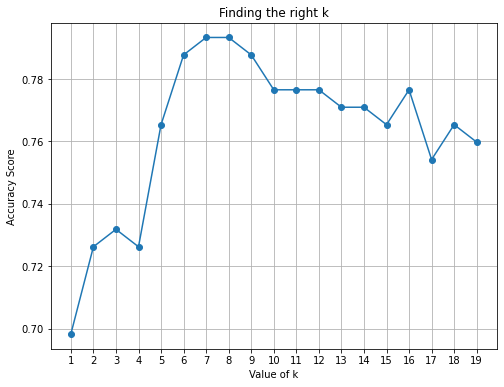

In [43]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.grid()
plt.show()

- 7 e 8 foram os valores de k que retornaram o melhor valor em acurácia

### 2. Decision Tree Algorithm

- Assim como no modelo anterior também precisaremos avaliar um parâmetro e verificar qual é o que melhor se adequa aos dados

In [44]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.7430167597765364
For max depth =  2  :  0.7374301675977654
For max depth =  3  :  0.7988826815642458
For max depth =  4  :  0.776536312849162
For max depth =  5  :  0.7877094972067039
For max depth =  6  :  0.7486033519553073
For max depth =  7  :  0.7374301675977654


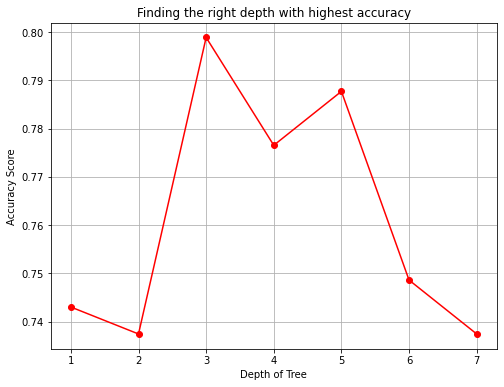

In [45]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.grid()
plt.show()

- Maior acurácia foi obtida em "depth of Tree" = 3

### 3. Random Forest Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.7653631284916201


### 4. Support Vector Machine

In [47]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train,y_train)
yhat = clf_svm.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.8044692737430168


### 5. Naive Bayes Algorithm

In [48]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
y_hat = clf_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.6983240223463687


### 6. Logistic Regression Algorithm

In [49]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train,y_train)
yhat = regr.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.6983240223463687


### 7. Stochastic Gradient Descent Classifier

In [50]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1)
clf_SGD.fit(X_train,y_train)
yhat = clf_SGD.predict(X_test)
print(accuracy_score(y_test,yhat))

0.3575418994413408


### Cross Validation

- Vamos fazer uma análise mais específica dos 3 melhores modelos
    1. Decision Tree Algorithm
    2. Support Vector Machine
    3. Nearest Neighbor Algorithm
- Vamos aplicar o método de cross validation para testar os valores obtidos

In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","KNeighboors"]})
cv_res = cv_res.sort_values(by='CrossValMeans',ascending = False)

display(cv_res)

,CrossValMeans,CrossValerrors,Algorithm
0,0.819014,0.049164,SVC
2,0.806358,0.046042,KNeighboors
1,0.786600,0.050281,DecisionTree


- Após o processo de Cross Validation, o valor mais alto obtido foi o do modelo SVC

# Conclusão e Comentários Finais

- O melhor modelo obtido após o processo de cross validation foi o SVC
- Acredito que a falta de conhecimentos aprofundados sobre todos os assuntos que englobam o titanic limitaram um pouco minhas propostas, principalmente na etapa de feature engineering. Melhores conhecimentos, por exemplo, sobre a forma como os Tickets eram vendidos ou sobre a posição das cabines poderiam ser muito relevantes para novas formas de tratamento dessas colunas
- De maneira geral, fiquei satisfeito com o treinamento dos modelos embora esperasse resultados maiores no modelo de Logistic Regression Algorithm
- Um ponto muito positivo foi o maior contato com estruturas de lambda expressions, funções map, e list comprehension
- Introduzi um gráfico novo nos meus códigos: 'pivot_table' (Nunca tinha utiolizado até então)
- Contato com diferentes modelos de Machine Learning (Primeiro projeto com modelos de classificação)
- Primeiro contato com conceitos como 'Cross Validation' e 'Standardisation of the Data'.
- Meta: No próximo projeto explorar de maneira mais aprofundada esses dois conceitos